In [358]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"


In [359]:
city_df = pd.read_csv("./city_data.csv")
ride_df = pd.read_csv("./ride_data.csv")

In [360]:
city_df.duplicated().sum()

0

In [361]:
ride_df.duplicated().sum()

0

In [362]:
combined_df = pd.merge(city_df, ride_df,how='left',on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [363]:
combined_df.duplicated().sum()

0

In [364]:
city_type = combined_df["type"].unique()
city_type

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [365]:
table_data = combined_df.groupby(["city","driver_count","type"])

city_data = pd.DataFrame()
city_data["Total Rides"] = table_data["ride_id"].count()
city_data["Average Fare"] = table_data["fare"].mean()
city_data = city_data.reset_index()


city_data.head()

,city,driver_count,type,Total Rides,Average Fare
0,Amandaburgh,12,Urban,18,24.641667
1,Barajasview,26,Urban,22,25.332273
2,Barronchester,11,Suburban,16,36.422500
3,Bethanyland,22,Suburban,18,32.956111
4,Bradshawfurt,7,Rural,10,40.064000


In [366]:
urban = city_data[city_data["type"] == 'Urban']
suburban = city_data[city_data["type"] == 'Suburban']
rural = city_data[city_data["type"] == 'Rural']

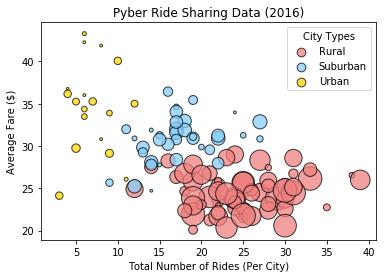

In [367]:
colors = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': colors['Light Coral'], 'Suburban': colors['Light Sky Blue'], 'Rural': colors['Gold']}

plt.scatter(urban['Total Rides'], 
            urban['Average Fare'], 
            s = urban['driver_count']*8, 
            color = city_color['Urban'], 
            edgecolor = 'black', 
            label = 'Urban', 
            alpha = .75)

plt.scatter(suburban['Total Rides'], 
            suburban['Average Fare'], 
            s = suburban['driver_count']*8, 
            color = city_color['Suburban'], 
            edgecolor = 'black', 
            label = 'Suburban', 
            alpha = .75)

plt.scatter(rural['Total Rides'], 
            rural['Average Fare'], 
            s = rural['driver_count']*8, 
            color = city_color['Rural'], 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .75)

plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

lgd = plt.legend(labels=('Rural','Suburban','Urban'), loc='best', title='City Types')
lgd.legendHandles[0]._sizes = [75]
lgd.legendHandles[1]._sizes = [75]
lgd.legendHandles[2]._sizes = [75]

plt.show()

In [368]:
city_final = combined_df.groupby('type')

<function matplotlib.pyplot.show(*args, **kw)>

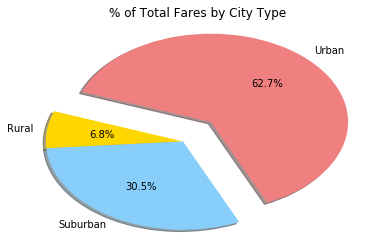

In [369]:
total_fare =  city_final['fare'].sum()

labels = total_fare.index
colors = ['gold','lightskyblue','lightcoral']
explode = [0 , 0, .3]

plt.pie(total_fare, 
        startangle = 160, 
        colors = colors, 
        explode = explode, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True)

plt.title('% of Total Fares by City Type')
plt.axis('tight')
plt.show

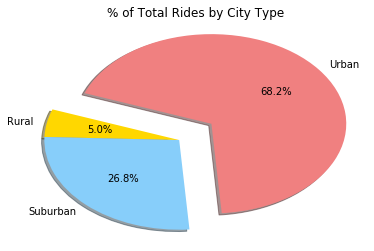

In [370]:
total_ride = city_final['ride_id'].sum()

labels = total_ride.index

plt.pie(total_ride, 
        startangle = 160, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True)

plt.title('% of Total Rides by City Type')
plt.axis('tight')
plt.show()

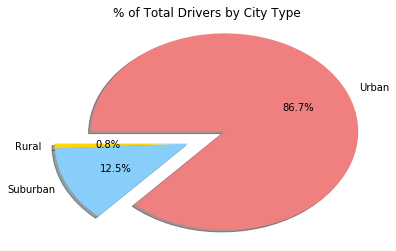

In [371]:
driver_total = city_final['driver_count'].sum()

labels = driver_total.index

plt.pie(driver_total, 
        startangle = 180, 
        explode = explode, 
        colors = colors, 
        labels = labels, 
        autopct = "%1.1f%%", 
        shadow = True)

plt.title('% of Total Drivers by City Type')
plt.axis('tight')
plt.show()
